In [7]:
#### Categorical Data Plots
import seaborn as sns
# %matplotlib inline

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight') 

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [9]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [16]:
tips.groupby(['sex','smoker'])['tip'].value_counts()

sex     smoker  tip 
Male    Yes     2.00    10
                3.00     9
                4.00     6
                1.50     3
                1.00     1
                        ..
Female  No      4.20     1
                4.67     1
                5.14     1
                5.17     1
                5.20     1
Name: tip, Length: 156, dtype: int64

In [18]:
tips.groupby(['sex','smoker']).size().sort_values(ascending=False).to_frame().rename(columns={0:'count'})

count
sex    smoker       
Male   No         97
       Yes        60
Female No         54
       Yes        33

In [20]:
import numpy as np

a1 = np.array([2,200,20,134,12,14,17,20,45,670])
a2 = np.array([2,20,12,14,17,20])


print(np.mean(a1),np.mean(a2),
      '\n', np.var(a1), np.var(a2),\
      '\n', np.std(a1),np.std(a2))

print(np.median(a1))

113.4 14.166666666666666 
 38171.840000000004 38.138888888888886 
 195.37615002860508 6.175669104549635
20.0


In [21]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


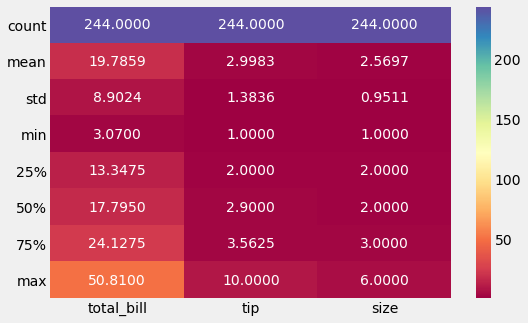

In [24]:
tips.describe()
# min bill -3, max bill - 350, std - 200, mean- 130, 75%- 350 , 25%- 50 , median - 80

fig = plt.figure(figsize = (8,5)) # (width, height)
sns.heatmap(tips.describe(), annot = True, fmt = '0.4f',  cmap="Spectral") # color mapping
plt.show()

![image.png](attachment:image.png)

In [25]:
tips.corr()  #[-1, +1], Pearson correaltion -- [-1, +1]  
# negative coorelation ---->  expenditure - Saving- [Strong Negative  -  -1]
# Positive coorelation ----> Salary - Benifits - [Strong positive - +1]
# no realtion          ----> Salary - Travel Time - [around 0]

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

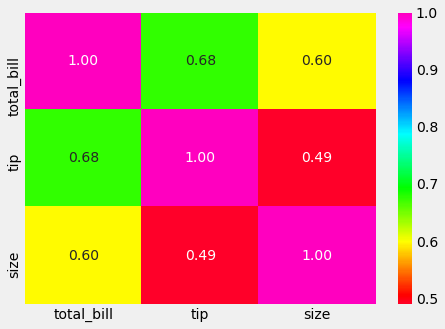

In [27]:
#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
fig = plt.figure(figsize = (7,5))
sns.heatmap(tips.corr(), annot = True, fmt = '0.2f',  cmap="gist_rainbow")

In [28]:
tips['total_bill'].max()

50.81

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

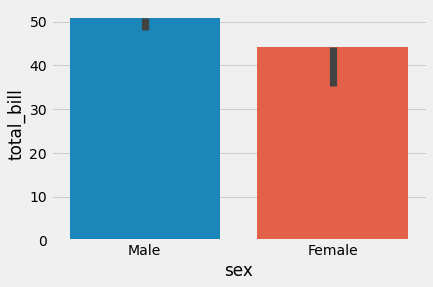

In [33]:
# Bar Plot
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.max)

In [34]:
tips.groupby('day').time.value_counts()

day   time  
Thur  Lunch     61
      Dinner     1
Fri   Dinner    12
      Lunch      7
Sat   Dinner    87
Sun   Dinner    76
Name: time, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

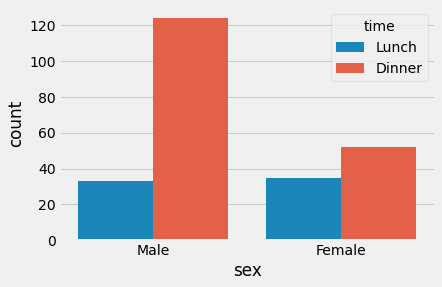

In [35]:
# Count plot
sns.countplot(x='sex',data=tips, hue='time')

![image.png](attachment:image.png)


**-IQR = Q3-Q1**


**-upperlimit = Q3+ (1.5*IQR)**


**-lowerlimit = Q1- (1.5*IQR)**

In [36]:
import numpy as np
np.percentile(tips['total_bill'], 70)

22.508

In [37]:
# np.where(tips['total_bill']>40,18,tips['total_bill'])

# tips['total_bill_2']= tips['total_bill'].apply(lambda x: 18 if x>40 else x )

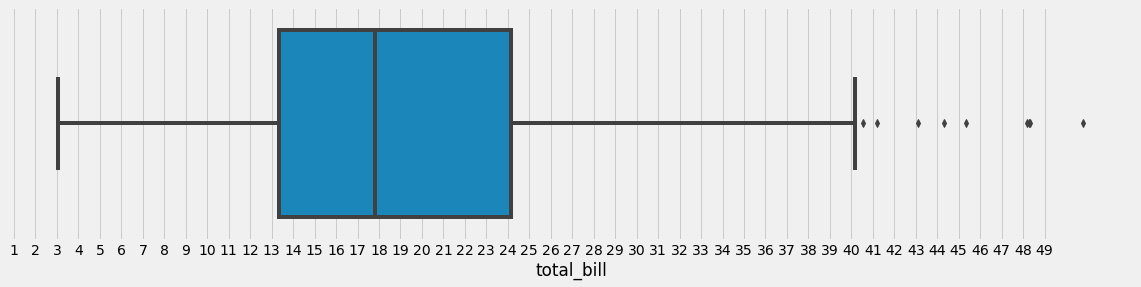

In [38]:
fig=plt.figure(figsize=(18,4))
sns.boxplot(x = 'total_bill', data = tips)
plt.xticks(np.arange(1, 50,1)) # setting x axis range
plt.show()
#  50,000, 60,000, NAN,  150,000, 200,000, 20,000, 200,00 # MEDIAN

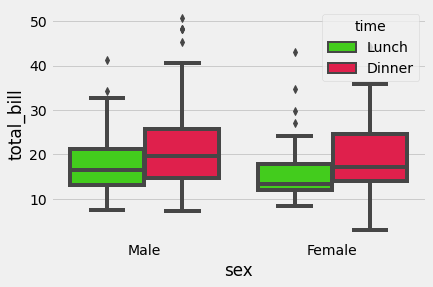

In [46]:
sns.boxplot(x="sex", y="total_bill", data=tips, palette='prism', hue='time')

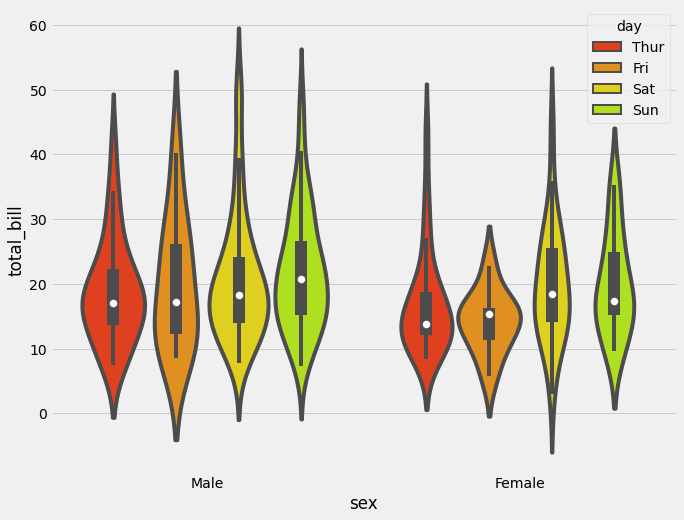

In [47]:
fig=plt.figure(figsize=(10,8))
sns.violinplot(x="sex", 
               y="total_bill", 
               data=tips,
               hue='day',
               palette='prism')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

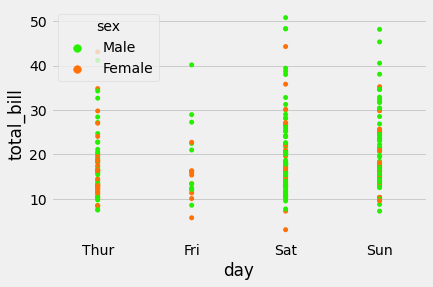

In [ ]:
# Strip Plot
sns.stripplot(x="day", y="total_bill", data=tips,
              jitter=False,
              hue='sex',
              palette='gist_ncar')


<AxesSubplot:xlabel='day', ylabel='total_bill'>

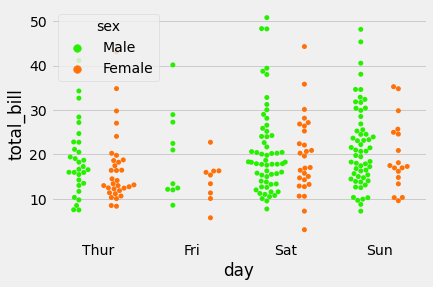

In [ ]:
# Swarm plot
sns.swarmplot(x="day", y="total_bill",
              hue='sex',
              data=tips,
              palette="gist_ncar",
              split=True)

from Matplotlib
https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

from Seaborn
https://seaborn.pydata.org/generated/seaborn.set_style.html 

<AxesSubplot:xlabel='sex', ylabel='count'>

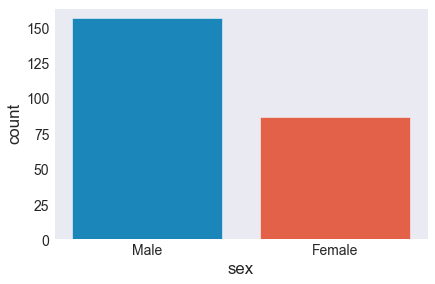

In [ ]:
sns.set_style("dark")  # {darkgrid, whitegrid, dark, white, ticks) -- from seaborn
sns.countplot(x='sex',data=tips)